<a href="https://colab.research.google.com/github/gruhasatya/ML01/blob/main/ML02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Explore Data Analysis with Logistic Regression 
import pandas as pd #data processing and manpulation
import numpy as np  # linear algebra
import matplotlib.pyplot as plt # Data visulaization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA #Principal component analysis . Data to project in lower dimensonal space
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import seaborn as sns # extension to matplotlib
import os 
for dirname, _, file in os.walk('/content/Social_Network_Ads.csv'):
  for files in file:
    print(os.path.join(dirname, files))


In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv') # Read Data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#EDA
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df.dtypes  # to find Data Types

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.drop(columns=['User ID'],inplace = True)  #len(df['User ID'].unique())

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
# now changing names to numbers
label_encoder = LabelEncoder()
minmaxsc = MinMaxScaler()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df_1 = minmaxsc.fit_transform(df.iloc[:,:-1]) # Fit and Transform


In [16]:
# train and Test
x_train, x_test, y_train, y_test = train_test_split(df_1,df['Purchased'])
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
x = x_train
y = y_train

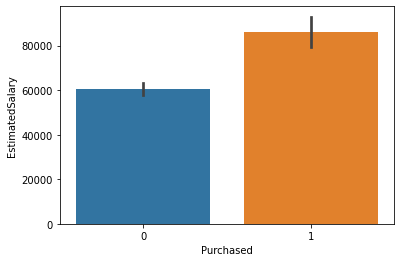

In [17]:
sns.barplot(data=df, x='Purchased',y='EstimatedSalary')
plt.show()

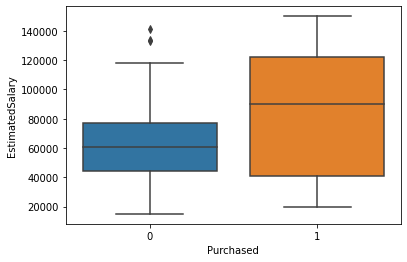

In [18]:
sns.boxplot(data=df, x='Purchased',y='EstimatedSalary')
plt.show()

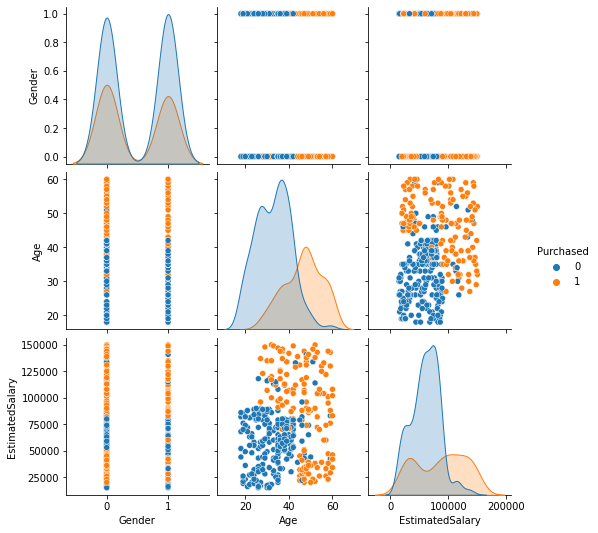

In [19]:
#pairplot
sns.pairplot(df,hue='Purchased')
plt.show()

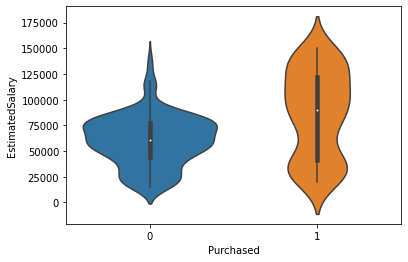

In [21]:
sns.violinplot(data=df, x='Purchased',y='EstimatedSalary')
plt.show()

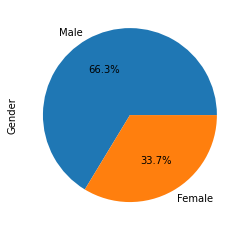

In [20]:
df_gender=df[['Gender','Purchased']].groupby('Purchased').sum()
df_gender.index=['Male','Female']
df_gender['Gender'].plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [24]:
model= LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
print('Coefficient: \n', model.coef_)
print('Intercept:\n',model.intercept_)

Coefficient: 
 [[3.86919150e-03 5.21628312e+00 2.93142477e+00]]
Intercept:
 [-4.42630961]
